In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1

In [5]:
df = pd.read_csv('02_dataset_worldbank_jobs_2016.tsv',delimiter='\t')

In [22]:
df = df.dropna().reset_index()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36022 entries, 0 to 36021
Data columns (total 6 columns):
index            36022 non-null int64
Country Name     36022 non-null object
Country Code     36022 non-null object
Series Name      36022 non-null object
Series Code      36022 non-null object
2016 [YR2016]    36022 non-null object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


after investigation, found out that missing data is represented by ".."

In [76]:
df[df["2016 [YR2016]"] == ".."]

,index,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
23,23,Afghanistan,AFG,Ease of doing business index (1=most business-...,IC.BUS.EASE.XQ,..
24,24,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,..
45,45,Afghanistan,AFG,Fuel exports (% of merchandise exports),TX.VAL.FUEL.ZS.UN,..
50,50,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,..
51,51,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,..
...,...,...,...,...,...,...
36003,36003,Zimbabwe,ZWE,"Unemployment with advanced education, female (...",SL.UEM.ADVN.FE.ZS,..
36004,36004,Zimbabwe,ZWE,"Unemployment with advanced education, male (% ...",SL.UEM.ADVN.MA.ZS,..
36005,36005,Zimbabwe,ZWE,Unemployment with intermediate education (% of...,SL.UEM.INTM.ZS,..
36006,36006,Zimbabwe,ZWE,"Unemployment with intermediate education, fema...",SL.UEM.INTM.FE.ZS,..


In [144]:
pivoted_df = df.pivot(index='Country Code', columns='Series Code', values='2016 [YR2016]')
pivoted_df

Series Code,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,..,71743528.4916201,..,5787158.10055866,..,95.5701446533203,..,582.344444444444,126.019533027619,..,...,104822,59547,56.808,45275,43.192,4.9181484453,5.797836151,0.105049448266972,11.88815623,3.75873566084448
AFG,-0.0758945950132622,118216397.348387,0.480709517928724,277483515.060727,..,84.1371383666992,..,53.0834053242655,1.07421538203442,3.05195383587665,...,34656032,25985093,74.98,8670939,25.02,0.262056153,185.0455137,..,434.3793696,..
AGO,2.88213834819657,1176110313.56,4.30516364069576,3988048.38,..,40.5206069946289,..,23.1117855137563,..,18.1587749690844,...,28813463,10329915,35.851,18483548,64.149,..,223.0964467,..,344.7317258,..
ALB,0.0592091751160614,147128144.977279,8.78673446886916,996001354.462477,..,100,..,104.967189781022,33.8068122098151,157.797944425991,...,2876101,1195854,41.579,1680247,58.421,2.9414365045,556.6603641,11.1789815992628,750.385083,0.647750656841347
AND,..,..,..,..,..,100,..,164.427659574468,..,..,...,77281,9082,11.752,68199,88.248,..,149.8840596,..,186.0462838,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,0.700565756032146,66734849.5572601,3.62936692691499,764488042.103565,..,100,..,166.822816202811,38.3268809808933,74.7521025414702,...,1816200,..,..,..,..,..,..,..,..,..
YEM,0.191606931501499,..,-3.08016185948595,..,..,71.6423492431641,..,52.2457961626608,..,..,...,27584213,17821057,64.606,9763156,35.394,..,11.12988709,..,24.5158127,..
ZAF,1.5182706815113,896870556.213536,0.749015048767685,..,321.649882279292,84.2,..,46.1758591695587,69.2897894314741,..,...,56015473,19414403,34.659,36601070,65.341,8.6167994168,156.2443961,9.98146418269729,250.445219,5.29205550382907


# 2

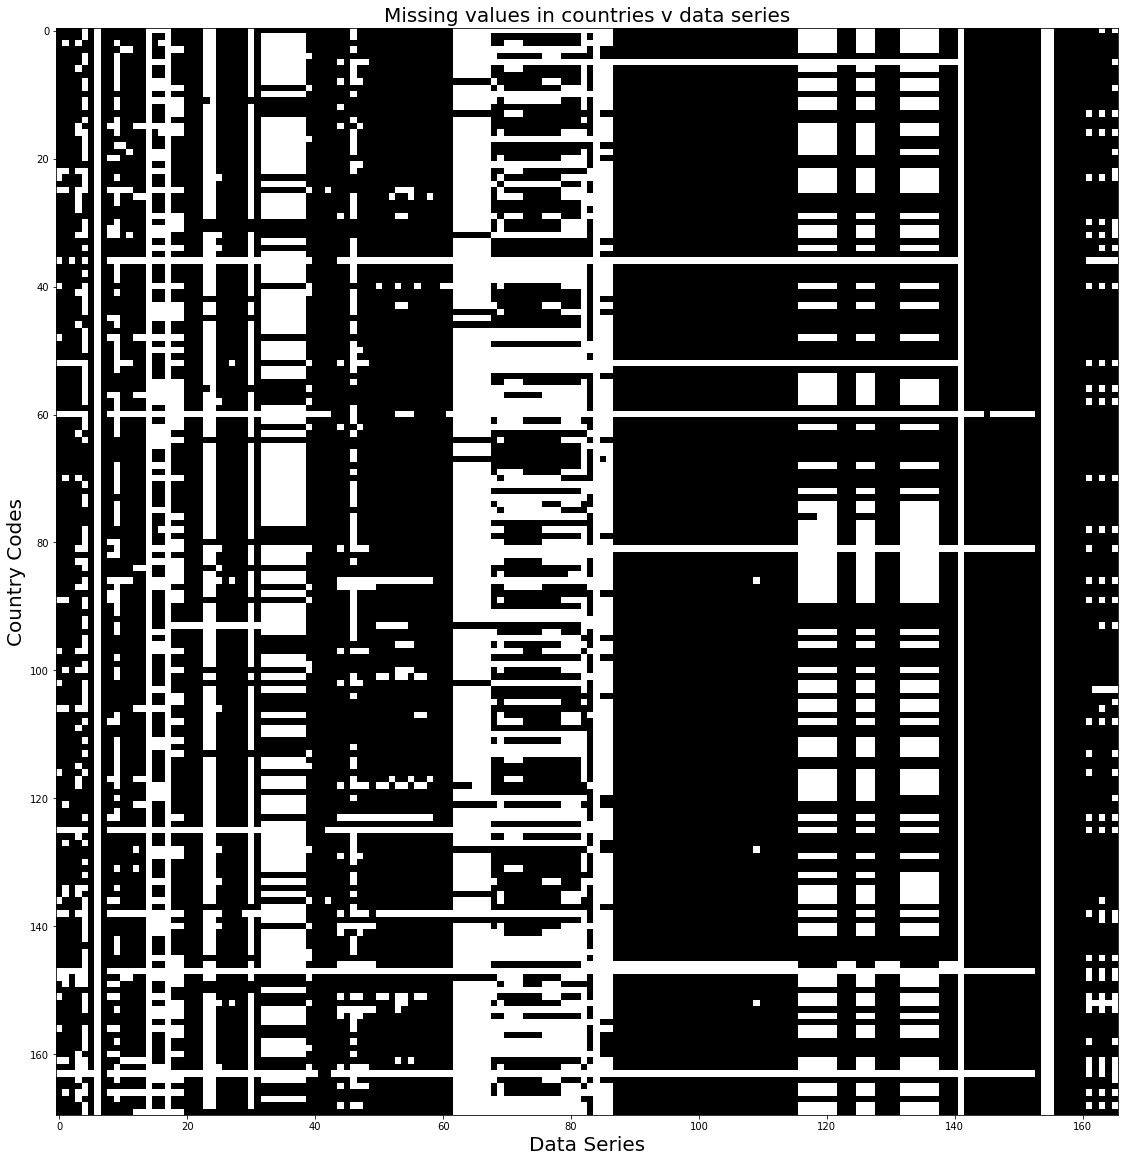

In [237]:
plt.figure(figsize=(30, 20))
plt.title('Missing values in countries v data series', fontsize=20)
plt.ylabel('Country Codes', fontsize=20)
plt.xlabel('Data Series', fontsize=20)
plt.imshow((pivoted_df== '..'), cmap='gist_heat')

In [192]:
pivoted_df.index[0]
dropped_pivot = pivoted_df.copy()

In [193]:
for iCntry in range(np.shape(pivoted_df)[0]):
    if(np.unique(pivoted_df.values[iCntry] == '..', return_counts=True)[1][1] >= 60):
        #drop the row which has more than or equal to 60
        dropped_pivot.drop(pivoted_df.index[iCntry], inplace=True)

In [215]:
dropped_pivot

Series Code,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,
AUS,-0.20730251757587,6309637353.01638,3.52471986219263,..,105.004349206589,100,..,3.15150527836716,168.0283162457,..,...,24210809,3437935,14.2,20772874,85.8,9.9972448891,165.1456124,27.6539209096296,299.2810441,14.7815586115506
AUT,-7.32537674811396,4523562276.56779,-7.66336096729233,300808432.749612,30.9561751988113,100,..,105.869490929801,116.058588713345,..,...,8736668,3677700,42.095,5058968,57.905,7.4494258902,149.8618785,1.70589776180728,225.3503917,17.5747647786539
AZE,6.79632854454764,740236000,11.8826533237788,564194000,..,100,..,118.043284177927,32.7178963972138,..,...,9757812,4388966,44.979,5368846,55.021,2.7307244764,496.9426578,87.5149826574534,757.049341,2.08350108444463
BDI,0.00121193596025418,19085453.3147457,0.00184302699096698,20695363.3045118,..,7.58847713470459,..,409.817640186916,1.39618221729249,..,...,10524117,9220389,87.612,1303728,12.388,5.954808309,98.23888469,0,218.5510842,..
BEL,6.14270247407187,3890062783.89885,7.9164959229974,79716874.0421988,80.8785976574384,100,..,374.221334214003,88.2275478229239,698.712685514165,...,11331422,235807,2.081,11095615,97.919,3.0037730284,144.7300771,6.82584136026284,211.7955741,12.536063077866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,1.95383604019208,18058170.8249882,0.321022637394075,132604667.983912,..,100,..,68.9487632508834,47.0767757278638,123.966137188218,...,195125,158674,81.319,36451,18.681,4.6171483859,65.79322959,21.4788157608196,86.21538462,0.852263362981328
YEM,0.191606931501499,..,-3.08016185948595,..,..,71.6423492431641,..,52.2457961626608,..,..,...,27584213,17821057,64.606,9763156,35.394,..,11.12988709,..,24.5158127,..
ZAF,1.5182706815113,896870556.213536,0.749015048767685,..,321.649882279292,84.2,..,46.1758591695587,69.2897894314741,..,...,56015473,19414403,34.659,36601070,65.341,8.6167994168,156.2443961,9.98146418269729,250.445219,5.29205550382907


In [214]:
dropped_pivot.drop(columns=dropped_pivot.columns[0])

Series Code,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,BX.TRF.PWKR.CD,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.ELEC.KH.PC,EN.POP.DNST,FB.ATM.TOTL.P5,FB.CBK.BRWR.P3,FP.CPI.TOTL,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,
AUS,6309637353.01638,3.52471986219263,..,105.004349206589,100,..,3.15150527836716,168.0283162457,..,113.475546305931,...,24210809,3437935,14.2,20772874,85.8,9.9972448891,165.1456124,27.6539209096296,299.2810441,14.7815586115506
AUT,4523562276.56779,-7.66336096729233,300808432.749612,30.9561751988113,100,..,105.869490929801,116.058588713345,..,111.675470271742,...,8736668,3677700,42.095,5058968,57.905,7.4494258902,149.8618785,1.70589776180728,225.3503917,17.5747647786539
AZE,740236000,11.8826533237788,564194000,..,100,..,118.043284177927,32.7178963972138,..,132.387827722937,...,9757812,4388966,44.979,5368846,55.021,2.7307244764,496.9426578,87.5149826574534,757.049341,2.08350108444463
BDI,19085453.3147457,0.00184302699096698,20695363.3045118,..,7.58847713470459,..,409.817640186916,1.39618221729249,..,162.583720148134,...,10524117,9220389,87.612,1303728,12.388,5.954808309,98.23888469,0,218.5510842,..
BEL,3890062783.89885,7.9164959229974,79716874.0421988,80.8785976574384,100,..,374.221334214003,88.2275478229239,698.712685514165,110.773882150291,...,11331422,235807,2.081,11095615,97.919,3.0037730284,144.7300771,6.82584136026284,211.7955741,12.536063077866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,18058170.8249882,0.321022637394075,132604667.983912,..,100,..,68.9487632508834,47.0767757278638,123.966137188218,109.762507807415,...,195125,158674,81.319,36451,18.681,4.6171483859,65.79322959,21.4788157608196,86.21538462,0.852263362981328
YEM,..,-3.08016185948595,..,..,71.6423492431641,..,52.2457961626608,..,..,..,...,27584213,17821057,64.606,9763156,35.394,..,11.12988709,..,24.5158127,..
ZAF,896870556.213536,0.749015048767685,..,321.649882279292,84.2,..,46.1758591695587,69.2897894314741,..,138.859306590936,...,56015473,19414403,34.659,36601070,65.341,8.6167994168,156.2443961,9.98146418269729,250.445219,5.29205550382907


In [222]:
np.unique(dropped_pivot.values[0] == '..', return_counts=True, return_index=True)

(array([False,  True]), array([0, 3]), array([119,  47]))

In [229]:
dropped_pivot.drop(columns=dropped_pivot.columns[dropped_pivot.values[0] == '..'])

Series Code,BM.KLT.DINV.WD.GD.ZS,BM.TRF.PWKR.CD.DT,BX.KLT.DINV.WD.GD.ZS,CM.MKT.LCAP.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,FB.ATM.TOTL.P5,FP.CPI.TOTL,FP.CPI.TOTL.ZG,FS.AST.DOMS.GD.ZS,...,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,TM.VAL.ICTG.ZS.UN,TX.QTY.MRCH.XD.WD,TX.VAL.FUEL.ZS.UN,TX.VAL.MRCH.XD.WD,TX.VAL.TECH.MF.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,
AUS,-0.20730251757587,6309637353.01638,3.52471986219263,105.004349206589,100,3.15150527836716,168.0283162457,113.475546305931,1.276990945,182.772402132277,...,24210809,3437935,14.2,20772874,85.8,9.9972448891,165.1456124,27.6539209096296,299.2810441,14.7815586115506
AUT,-7.32537674811396,4523562276.56779,-7.66336096729233,30.9561751988113,100,105.869490929801,116.058588713345,111.675470271742,0.891590693,129.889612397413,...,8736668,3677700,42.095,5058968,57.905,7.4494258902,149.8618785,1.70589776180728,225.3503917,17.5747647786539
AZE,6.79632854454764,740236000,11.8826533237788,..,100,118.043284177927,32.7178963972138,132.387827722937,4.179993538,38.9158020083525,...,9757812,4388966,44.979,5368846,55.021,2.7307244764,496.9426578,87.5149826574534,757.049341,2.08350108444463
BDI,0.00121193596025418,19085453.3147457,0.00184302699096698,..,7.58847713470459,409.817640186916,1.39618221729249,162.583720148134,5.538485174,34.9732931277782,...,10524117,9220389,87.612,1303728,12.388,5.954808309,98.23888469,0,218.5510842,..
BEL,6.14270247407187,3890062783.89885,7.9164959229974,80.8785976574384,100,374.221334214003,88.2275478229239,110.773882150291,1.972249752,153.690188455693,...,11331422,235807,2.081,11095615,97.919,3.0037730284,144.7300771,6.82584136026284,211.7955741,12.536063077866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,1.95383604019208,18058170.8249882,0.321022637394075,..,100,68.9487632508834,47.0767757278638,109.762507807415,1.30385728,80.1805336399877,...,195125,158674,81.319,36451,18.681,4.6171483859,65.79322959,21.4788157608196,86.21538462,0.852263362981328
YEM,0.191606931501499,..,-3.08016185948595,..,71.6423492431641,52.2457961626608,..,..,..,..,...,27584213,17821057,64.606,9763156,35.394,..,11.12988709,..,24.5158127,..
ZAF,1.5182706815113,896870556.213536,0.749015048767685,321.649882279292,84.2,46.1758591695587,69.2897894314741,138.859306590936,6.3262638,176.576039475023,...,56015473,19414403,34.659,36601070,65.341,8.6167994168,156.2443961,9.98146418269729,250.445219,5.29205550382907


In [231]:
for iCntry in range(np.shape(dropped_pivot)[0]):
    dropped_pivot.drop(columns=dropped_pivot.columns[dropped_pivot.values[iCntry] == '..'],inplace=True)

Check if our method was OK

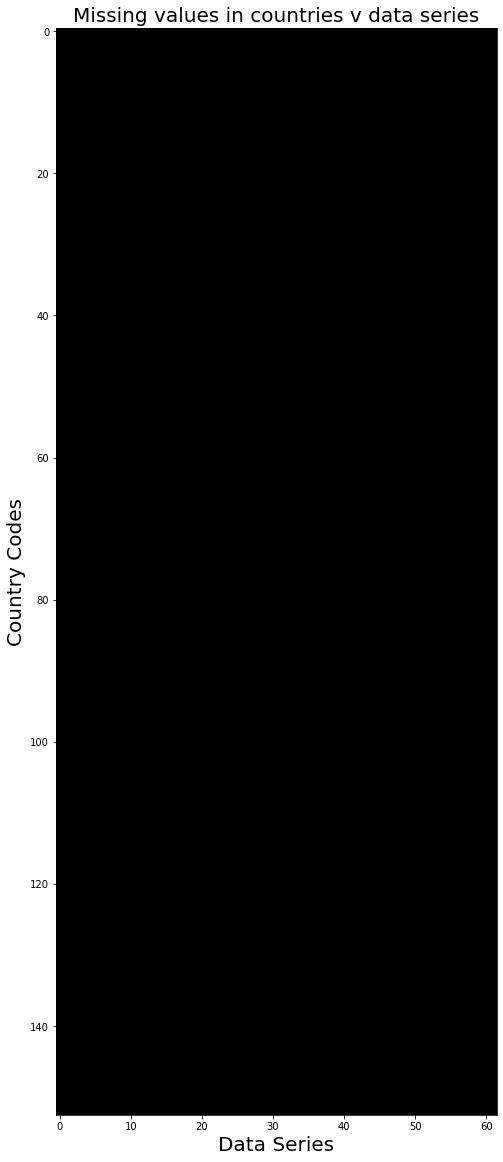

In [238]:
plt.figure(figsize=(30, 20))
plt.title('Missing values in countries v data series', fontsize=20)
plt.ylabel('Country Codes', fontsize=20)
plt.xlabel('Data Series', fontsize=20)
plt.imshow((dropped_pivot== '..'), cmap='gist_heat')

In [242]:
dropped_pivot.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, AUS to ZWE
Columns: 62 entries, BX.KLT.DINV.WD.GD.ZS to SP.URB.TOTL.IN.ZS
dtypes: object(62)
memory usage: 75.3+ KB


In [283]:
for iSerie in range(np.shape(dropped_pivot.columns)[0]):
    print(df[df['Series Code'] == dropped_pivot.columns[iSerie]]['Series Name'].values[0])

Foreign direct investment, net inflows (% of GDP)
Access to electricity (% of population)
Population density (people per sq. km of land area)
Mobile cellular subscriptions (per 100 people)
Telephone lines (per 100 people)
Individuals using the Internet (% of population)
GDP growth (annual %)
Employment in agriculture, female (% of female employment) (modeled ILO estimate)
Employment in agriculture, male (% of male employment) (modeled ILO estimate)
Employment in agriculture (% of total employment) (modeled ILO estimate)
Employers, female (% of female employment) (modeled ILO estimate)
Employers, male (% of male employment) (modeled ILO estimate)
Employers, total (% of total employment) (modeled ILO estimate)
Own-account workers, female (% of female employment) (modeled ILO estimate)
Own-account workers, male (% of male employment) (modeled ILO estimate)
Own-account workers, total (% of male employment) (modeled ILO estimate)
Self-employed, female (% of female employment) (modeled ILO e

# 3

In [284]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [316]:
df[df['Country Name'] == 'France'][0:1]

,index,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
11288,11288,France,FRA,Access to electricity (% of population),EG.ELC.ACCS.ZS,100


In [322]:
dropped_pivot.reset_index()

Series Code,Country Code,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,IT.CEL.SETS.P2,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NY.GDP.MKTP.KD.ZG,SL.AGR.EMPL.FE.ZS,SL.AGR.EMPL.MA.ZS,...,SP.POP.1564.TO.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
0,AUS,3.52471986219263,100,3.15150527836716,110.052090189742,33.9055439626412,88.2386580521762,2.82731051096303,1.68799996376038,3.43799996376038,...,65.8488024959786,3692849,15.2528939086411,51.8630483195639,1.49820974240174,24210809,3437935,14.2,20772874,85.8
1,AUT,-7.66336096729233,100,105.869490929801,163.794485784601,40.9451779741297,84.3233312921004,1.45091543821485,3.92899990081787,4.71999979019165,...,66.8762899389668,1662366,19.0274556058978,49.5298368459148,1.08139629872802,8736668,3677700,42.095,5058968,57.905
2,AZE,11.8826533237788,100,118.043284177927,104.76715758856,17.4824397534861,78.2,-3.10000020204575,42.0950012207031,30.9379997253418,...,70.9815846708652,570804,5.84971727571253,40.8816025988089,1.11785721013911,9757812,4388966,44.979,5368846,55.021
3,BDI,0.00184302699096698,7.58847713470459,409.817640186916,50.9098863116022,0.185668783423826,5.17362677652886,-0.570434450658766,96.3970031738281,85.7870025634766,...,52.5984175204438,266016,2.52767999443564,90.1197882258195,3.1353331460468,10524117,9220389,87.612,1303728,12.388
4,BEL,7.9164959229974,100,374.221334214003,110.498346639076,38.4830881237543,86.5165,1.41229201545339,0.754000008106232,1.67599999904633,...,64.6001511307203,2081424,18.368606999291,54.7983939052332,0.506300002451376,11331422,235807,2.081,11095615,97.919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,WSM,0.321022637394075,100,68.9487632508834,77.3903907751441,4.96040999359385,29.4117301129981,7.14516885471595,3.26200008392334,6.14200019836426,...,57.6784112748239,10658,5.46213965406791,73.3750944066818,0.702526006807934,195125,158674,81.319,36451,18.681
149,YEM,-3.08016185948595,71.6423492431641,52.2457961626608,59.5741303186718,4.22643198122056,24.5792083636211,-34.339754357643,57.2430000305176,34.3880004882813,...,56.8504274528333,797863,2.89246243856948,75.9001725764795,2.45150204297636,27584213,17821057,64.606,9763156,35.394
150,ZAF,0.749015048767685,84.2,46.1758591695587,147.125205923013,8.07428690283487,54,0.565362939110358,3.89599990844727,6.88100004196167,...,65.6131047933845,2918033,5.20933385673633,52.4085780041956,1.30137401321457,56015473,19414403,34.659,36601070,65.341
151,ZMB,3.16307184259788,27.2193374633789,22.3185541909361,72.4293383495898,0.611202557471074,25.5065788475702,3.75717780476374,62.8650016784668,44.6969985961914,...,52.4164883111059,413421,2.49178037524282,90.7796634648112,3.00281551523404,16591390,9550336,57.562,7041054,42.438


In [333]:
print(dropped_pivot.reset_index()[dropped_pivot.index == 'GRC'].index)
print(dropped_pivot.reset_index()[dropped_pivot.index == 'HUN'].index)
print(dropped_pivot.reset_index()[dropped_pivot.index == 'FRA'].index)

Int64Index([51], dtype='int64')
Int64Index([57], dtype='int64')
Int64Index([44], dtype='int64')


In [338]:
# scale before PCA
X  = StandardScaler().fit_transform(dropped_pivot)

pca = PCA()
X_pca = pca.fit_transform(X)

In [339]:
np.shape(X_pca)

(153, 62)

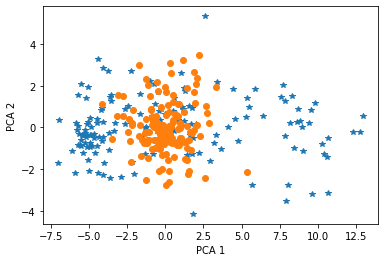

In [346]:
plt.plot(X_pca[:,0],X_pca[:,5],'*')
plt.plot(X_pca[:,5],X_pca[:,7],'o')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# 4

# 5